## Predicting Risk Factor for COVID-19: A Machine Learning Approach 
### Name: ONOJA ANTHONY (PhD In-View) Data Science, Scuola Normale, Superiore, Italy 

Here we first carry out KDD processes, before using Explainable Machine learning feature selection techniques. The best features were fed into the machine learning pipeline in order to predict the risk factor ("Lowest", "Low", "Medium", "High", "Highest") of COVID-19 from Risk Assessment Dataset. 

In [1]:
# import important libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

# Classifier Libraries
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

# Other Libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.preprocessing import RobustScaler
import warnings
from IPython.display import Image

# Feature selection 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
# Oversample severity cases. Imblearn's ADASYN was built for class-imbalanced datasets
from imblearn.over_sampling import SMOTE, ADASYN
# Definning models
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

### Load the Dataset 

#### 1. Data Preparation 

In [2]:
#reading the file using dask
import dask.dataframe as dd
import pandas as pd
path = "/Users/Hp/Downloads/"
%time df = pd.read_csv(path + "master_dataset_1.csv", encoding='latin1')

#df = pd.read_csv(path + "master_dataset_1.csv")

Wall time: 9.17 s


### Perform EDA 

In [3]:
df.describe()

,ip_latitude,ip_longitude,ip_accuracy,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,...,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,opinion_infection,opinion_mortality,risk_infection,risk_mortality
count,878599.000000,878599.000000,878587.000000,878595.000000,876702.000000,725310.000000,706575.000000,704417.000000,708830.000000,713192.000000,...,878599.000000,878599.000000,878599.000000,878599.000000,878599.000000,878599.000000,720826.000000,720826.000000,878585.000000,878585.000000
mean,34.994960,-76.176057,93.552922,29.489970,2.840373,2.547569,-0.720115,-0.787881,-0.851387,-0.849756,...,0.060993,0.003309,0.136608,0.074021,0.000481,0.014003,35.104935,20.845807,11.554046,0.364171
std,17.241774,43.626669,193.772243,7.839178,4.244590,8.252927,1.955722,1.020156,0.595501,0.585532,...,0.239317,0.057426,0.343434,0.261806,0.021937,0.117503,22.411241,21.612317,14.568256,0.993902
min,-53.873500,-175.275100,1.000000,10.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.050000
25%,33.679200,-96.182850,5.000000,23.900000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.000000,5.000000,0.050000
50%,38.936000,-84.550800,10.000000,27.700000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,15.000000,5.000000,0.066000
75%,42.338400,-76.379400,100.000000,33.500000,5.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,25.000000,13.000000,0.366000
max,71.332400,178.438600,1000.000000,147.100000,14.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.000000,95.000000,100.000000,75.000000


In [4]:
df.describe(include=['O'])

,survey_date,region,country,sex,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,working,rate_reducing_mask_type,prescription_medication
count,878598,141424,878511,878599,878594,878599,878599,878599,189856,189856,189856,189856,876742,874363,166561,264350
unique,147,6,194,4,11,123,141,10,3,5,7,3,8,5,7,73838
top,4/6/2020,EU,US,female,30_40,164,82,unknown,yes,med,white,native,never,stopped,clothhome,LEVOTHYROXINE SODIUM
freq,146506,73518,689022,570140,270398,76252,34859,286125,138720,94084,157707,171408,512093,357585,59646,13710


In [5]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title= 'EDA of COVID-19 Dataset', explorative=True)
#profile.to_notebook_iframe()

In [6]:
df.edit = df.copy()
df.edit.head(5)

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,3/25/2020,NaN,CA,43.7726,-79.3109,100.0,male,20_30,178,88,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.0,0.050
1,3/26/2020,NaN,CA,51.1472,-114.0872,5.0,female,30_40,158,54,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.0,0.050
2,3/25/2020,NaN,CA,43.1859,-79.8163,100.0,male,90_100,184,94,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,12.0,14.701
3,3/25/2020,NaN,CA,45.5784,-73.6855,5.0,male,60_70,172,96,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,6.0,2.250
4,3/25/2020,NaN,CA,49.1896,-122.9984,1.0,male,30_40,166,70,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.0,0.050


In [7]:
df.edit.columns

Index(['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude',
       'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'alcohol',
       'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'rate_reducing_risk_single',
       'rate_reducing_risk_single_social_distancing',
       'rate_reducing_risk_single_washing_hands', 'rate_reducing_risk_house',
       'rate_reducing_risk_house_social_distancing',
       'rate_reducing_risk_house_washing_hands',
       'rate_reducing_risk_single_sanitizer', 'rate_reducing_mask',
       'rate_reducing_mask_type', 'rate_government_action',
       'rate_government_control', 'rate_government_spend', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease

### Filling in Missing observations

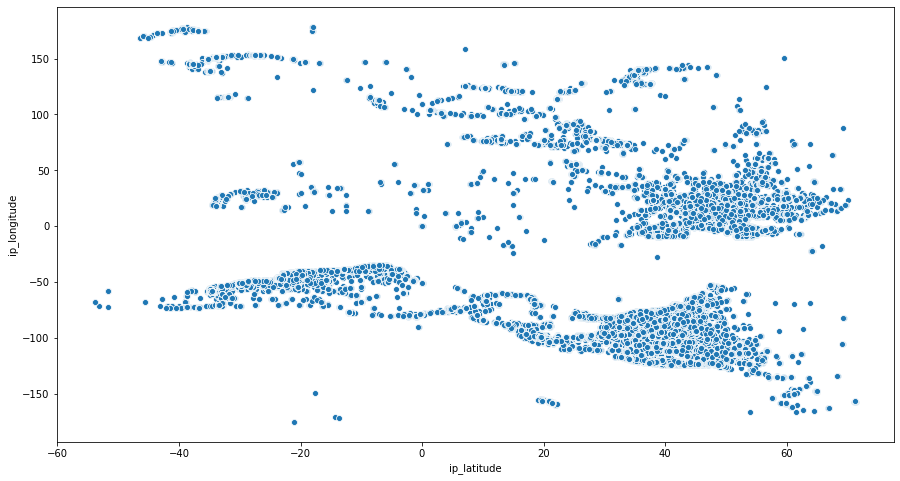

In [8]:
# Visualize geo locations 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(df['ip_latitude'], df['ip_longitude'])

#### Filling in Missing observations

In [9]:
df_1 = df.copy()

### Filling missing values 

In [10]:

#df.fillna(df.mode()[0], inplace=True)

# numeric columns
df_1.fillna(df_1.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df_1.fillna(df_1.select_dtypes(include='object').mode().iloc[0], inplace=True)

#### Feature Engineering 

In [11]:
df_1['bmi'] = pd.cut(df_1.bmi,bins=[0, 18.5, 24.9, 34.9, 39.9,147.1],labels=['Underweight','Normal', 'Overweight', 
                                                                            'Obesity', 'Extreme_Obesity'])
df_1.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,3/25/2020,34.995,CA,43.7726,-79.3109,100.0,male,20_30,178,88,...,0.0,0.0,0.0,0.0,0.0,34.995,34.99496,34.99496,5.0,0.050
1,3/26/2020,34.995,CA,51.1472,-114.0872,5.0,female,30_40,158,54,...,0.0,0.0,0.0,0.0,0.0,34.995,34.99496,34.99496,5.0,0.050
2,3/25/2020,34.995,CA,43.1859,-79.8163,100.0,male,90_100,184,94,...,0.0,1.0,0.0,0.0,0.0,34.995,34.99496,34.99496,12.0,14.701
3,3/25/2020,34.995,CA,45.5784,-73.6855,5.0,male,60_70,172,96,...,0.0,1.0,0.0,0.0,0.0,34.995,34.99496,34.99496,6.0,2.250
4,3/25/2020,34.995,CA,49.1896,-122.9984,1.0,male,30_40,166,70,...,0.0,0.0,0.0,0.0,0.0,34.995,34.99496,34.99496,5.0,0.050


In [12]:
# drop irrelevant columns 
column3drop = ['survey_date', 'ip_latitude', 'ip_accuracy', 'height', 'weight', 'ip_longitude', 'prescription_medication']
df_1.drop(column3drop, axis=1, inplace=True)

In [13]:
# To reduce computational time and complexities, we will randomly sample 20% from the 871k rows 
# Remove a 20% sample from the cleaned dataset 
df_11, df_14 = train_test_split(df_1, test_size=0.20)

#save train sample set as CSV file 
df_14 = pd.DataFrame(df_14, columns=df_1.columns)
df_14.to_csv(path+ "subset_risk_infection_dataset_111.csv", index = True)

In [14]:
column3drop = ['risk_infection', 'opinion_infection','opinion_mortality', 'risk_mortality', 'contacts_count',
       'house_count', 'public_transport_count']
df_14.drop(column3drop, axis=1, inplace=True)
df_13 = df_14.astype(str)
df_13 = pd.get_dummies(df_13) 

In [15]:
df_14.columns

Index(['region', 'country', 'sex', 'age', 'bmi', 'blood_type', 'insurance',
       'income', 'race', 'immigrant', 'smoking', 'alcohol', 'cannabis',
       'amphetamines', 'cocaine', 'lsd', 'mdma', 'working', 'worried',
       'rate_reducing_risk_single',
       'rate_reducing_risk_single_social_distancing',
       'rate_reducing_risk_single_washing_hands', 'rate_reducing_risk_house',
       'rate_reducing_risk_house_social_distancing',
       'rate_reducing_risk_house_washing_hands',
       'rate_reducing_risk_single_sanitizer', 'rate_reducing_mask',
       'rate_reducing_mask_type', 'rate_government_action',
       'rate_government_control', 'rate_government_spend', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker'],
      dtype='object')

In [16]:
#df_13.to_csv(path+ "subset_risk_infection_dataset_new_1.csv", index = True)

In [17]:
# import the clean version of susbset risk_infection dataset 
df_13 = pd.read_csv(path + "subset_risk_infection_dataset_1.csv")

In [18]:
#df_13 = pd.concat([df_11, df_12], axis=1, join='inner')

#df_new = pd.concat([df_1, df_13], axis=1, join='inner')
#sex_locs = sorted(df['sex'].unique())
#sex_locs_mapping = dict(zip(sex_locs, range(0, len(sex_locs) + 1)))
#sex_locs_mapping
#df['sex'] = df['sex'].map(sex_locs_mapping).astype(int)


In [19]:
df_13.head()

,region_AF,region_AS,region_EU,region_OC,region_SA,country_AD,country_AE,country_AG,country_AI,country_AL,...,mdma_27.0,mdma_28.0,mdma_3.0,mdma_4.0,mdma_5.0,mdma_6.0,mdma_7.0,mdma_8.0,mdma_9.0,risk_infection
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0


In [20]:
# drop irrelevant columns 
#column3drop = ['34.99495972223993', 'undefined', 'sex', 'bmi']
#df_new.drop(column3drop, axis=1, inplace=True)

#### Visualization of features

In [21]:
df_new = df_13.copy()

In [22]:
# Define the target variable 
target = 'risk_infection'

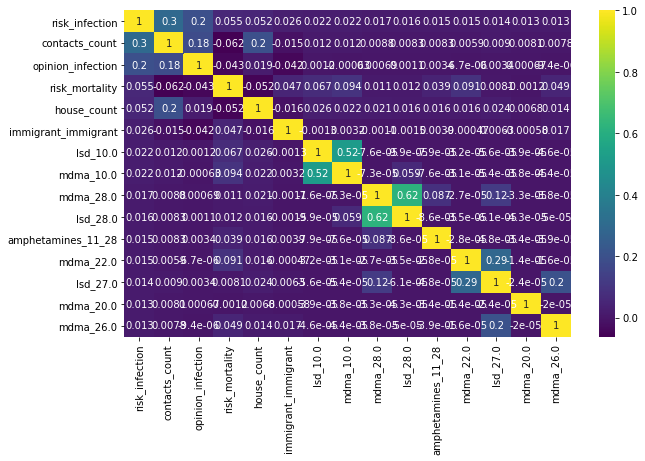

In [23]:
# using correlation plot to check for multi-collinearity
k = 15 #Number of variable for heatmap 
cols = df_new.corr().nlargest(k, target)[target].index 
cm = df_new[cols].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = 'viridis')

### Dealing with Multicollinearity in the dataset

In [24]:
#1) Identify Highly Correlated Features

# Create correlation matrix
corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80) or any(upper[column] < -(0.80))]

In [25]:
# Drop features 
df_1 = df_new.drop(df_new[to_drop], axis=1)
df_1.head()

,region_AF,region_AS,region_EU,region_OC,region_SA,country_AD,country_AE,country_AG,country_AI,country_AL,...,mdma_27.0,mdma_28.0,mdma_3.0,mdma_4.0,mdma_5.0,mdma_6.0,mdma_7.0,mdma_8.0,mdma_9.0,risk_infection
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0


In [26]:
#df_1.info()

In [27]:
# Binarize target feature 

# The risk infection status band was set in accordance with the survival risk calculator for COVID from 
# https://www.covid19survivalcalculator.com/en/research, the base infection rate of 60%

df_1['risk_infection'] = pd.cut(df_1.risk_infection,bins=[0, 22.5, 77.5, 100],
                                labels=['Low', 'Medium', 'High'])

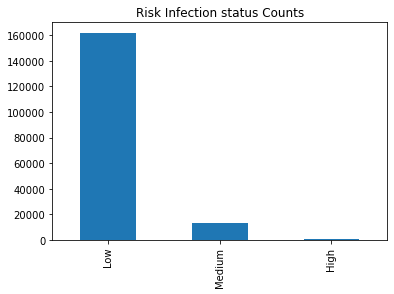

In [28]:
df_1['risk_infection'].value_counts()
df_1['risk_infection'].value_counts().plot(kind='bar', 
                                   title='Risk Infection status Counts')
plt.show()

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [30]:
#omit non-zero 
columnscolumn3drop = ['risk_infection']
X_ = df_1.drop(columnscolumn3drop, axis = 1)

In [31]:
#Transform data 
#add one to each value to get rid of 0 values in features

numeric_cols = [col for col in X_.columns if X_.columns[(X_ == 0).all()].any() != '0']
numeric_cols

df_1[numeric_cols] += 1
df_1.head()

,region_AF,region_AS,region_EU,region_OC,region_SA,country_AD,country_AE,country_AG,country_AI,country_AL,...,mdma_27.0,mdma_28.0,mdma_3.0,mdma_4.0,mdma_5.0,mdma_6.0,mdma_7.0,mdma_8.0,mdma_9.0,risk_infection
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Medium
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Low
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Medium
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Low
4,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Low


In [32]:
# To reduce computational time and complexities, we will randomly sample 20% from the 871k rows 
# Remove a 20% sample from the cleaned dataset 
#df_11, df_12 = train_test_split(df_1, test_size=0.20)

#save train sample set as CSV file 
#df_12 = pd.DataFrame(df_12, columns=df_1.columns)
#df_12.to_csv(path+ "subset_risk_infection_dataset.csv", index = True)

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoders = dict()
feat = ['risk_infection']

for col in feat:
    le = LabelEncoder()
    df_1[col] = le.fit_transform(df_1[col])
    label_encoders[col] = le

In [34]:
# The classes are heavily skewed we need to solve this issue later.
print('High', round(df_1['risk_infection'].value_counts()[0]/len(df_1) * 100,4), '% of the dataset')
print('Low', round(df_1['risk_infection'].value_counts()[1]/len(df_1) * 100,4), '% of the dataset')
print('Medium', round(df_1['risk_infection'].value_counts()[2]/len(df_1) * 100,4), '% of the dataset')

High 0.3073 % of the dataset
Low 92.1824 % of the dataset
Medium 7.5102 % of the dataset


In [35]:
# separating the dependent and independent variables without Multicollinearity
X_new = df_1.drop('risk_infection', 1)
y = df_1['risk_infection']

In [36]:
# encode the output
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [37]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [38]:
### SMOTE Sampling strategy for imbalanced class problem
#y_train = np.packbits(y_train, axis=-1)
X_train, y_train = SMOTE(k_neighbors=3).fit_sample(X_train, y_train)

In [39]:
np.unique(y_train)

array([0, 1, 2], dtype=int64)

In [40]:
# Rescale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# transform the testset 
X_test = scaler.transform(X_test)

# convert to dataframe
X_train = pd.DataFrame(X_train,columns=X_new.columns)
y_train = pd.DataFrame(y_train,columns=['risk_infection'])


X_test = pd.DataFrame(X_test,columns=X_new.columns)
y_test = pd.DataFrame(y_test,columns=['risk_infection'])

#### LASSO Feature selection Method

In [41]:
#ridge = Ridge()
lasso = Lasso()

lr_lasso = SelectFromModel(estimator=Lasso(alpha=1e-8,normalize = True, max_iter=500))
lasso = lr_lasso.fit(X_train,y_train)

In [42]:
# Evaluate feature importance LASSO 
lasso.estimator_.coef_

importance_lasso = pd.concat([pd.DataFrame(X_new.columns, columns = ["Features"]),
           pd.DataFrame(np.transpose(lasso.estimator_.coef_), columns = ["Importance"])
           ],axis = 1)
importance_lasso.sort_values(by='Importance', ascending=False).head(10)

,Features,Importance
206,contacts_count,0.138875
343,amphetamines_none_28,0.095903
257,rate_reducing_risk_house_A,0.061194
256,rate_reducing_risk_house_N,0.061147
193,insurance_yes,0.060976
1,region_AS,0.060921
374,cocaine_none_28,0.060577
284,rate_government_action_N,0.056415
305,hypertension_no,0.047591
2,region_EU,0.041711


In [43]:
#save as CSV file 
importance_lasso.to_csv(path+"importance_lasso_risk_infection_status.csv", index = True)

In [44]:
## transform train and test set for compared states of feature count matrices  

X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)

#### Logistic Classifier 

In [ ]:
# Train model
#logreg = LogisticRegression(C=1, class_weight={0: 0.11, 1: 1}, n_jobs=-1, penalty='l1',
                  # solver='saga').fit(X_train_lasso, y_train)
from sklearn.multiclass import OneVsRestClassifier

for multi_class in ('multinomial', 'ovr'):
    logreg = OneVsRestClassifier(LogisticRegression(solver='newton-cg', max_iter=1000, random_state=23,class_weight='balanced',
                                multi_class=multi_class)).fit(X_train_lasso, y_train)

In [ ]:
# Print confusion matrix Random Forest Classifier 

y_pred = logreg.predict(X_train_lasso)

print('Train Accuracy %s' % balanced_accuracy_score(y_train, y_pred))


In [ ]:
# Predict on training set
y_predict_log = logreg.predict(X_test_lasso)
accuracy = balanced_accuracy_score(y_test,y_predict_log)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

In [ ]:
#Logistic Regression classification Reports 
print('Test Accuracy %s' % balanced_accuracy_score(y_test, y_predict_log))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict_log))
print('Test F1-score %s' % f1_score(y_test, y_predict_log, average=None))
print(classification_report(y_test, y_predict_log))
confusion_matrix(y_test, y_predict_log)

In [ ]:
conf_matrix = confusion_matrix(y_test,y_predict_log)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

In [ ]:
# get importance Logistic regression best on best estimator identified from CV grid search 
#Analyzing the coefficients
importance_logreg = pd.concat([pd.DataFrame(X_new.columns, columns = ['Features']),
           pd.DataFrame(np.transpose(logreg.coef_), columns = ['Low Risk', 'Medium Risk', 'High Risk'])],axis = 1)
importance_logreg.sort_values(by='High Risk', ascending=False).head(10)

In [ ]:
#save as CSV file 
importance_logreg.to_csv("importance_features_logistics_reg_risk_infection.csv", index = True)

In [ ]:
# AUC plot of SVC classifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
plt.style.use('ggplot')

pred_prob = logreg.predict_proba(X_test_lasso)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
lw = 2
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr[0], tpr[0], linestyle='--',color='darkorange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Logistic Reg.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Multiclass ROC Logistic Reg.',dpi=300);    
plt.show();

#### Decision Tree Classifier 

In [ ]:
# Create Decision Tree classifer object
clf =  DecisionTreeClassifier(criterion="entropy", max_depth=3, class_weight='balanced')

# Train Decision Tree Classifer
clf = clf.fit(X_train_lasso,y_train)

In [ ]:
# Print confusion matrix Random Forest Classifier 

y_pred = clf.predict(X_train_lasso)

print('Train Accuracy %s' % balanced_accuracy_score(y_train, y_pred))

In [ ]:
y_predict = clf.predict(X_test_lasso)
accuracy = balanced_accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

In [ ]:
# Print confusion matrix Decision tree Classifier 

print('Test Accuracy %s' % balanced_accuracy_score(y_test, y_predict))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict))
print('Test F1-score %s' % f1_score(y_test, y_predict, average=None))
print(classification_report(y_test, y_predict))
confusion_matrix(y_test, y_predict)
conf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

In [ ]:
pred_prob = clf.predict_proba(X_test_lasso)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
lw = 2
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr[0], tpr[0], linestyle='--',color='darkorange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Decision tree.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Multiclass ROC Logistic Reg.',dpi=300);    
plt.show();

In [ ]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_new.columns,class_names=['Low','Medium', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('risk_infection.png')
Image(graph.create_png())


In [ ]:
# get importance Decision tree best on best estimator identified from CV grid search 
#Analyzing the coefficients
importance_clf = pd.concat([pd.DataFrame(X_new.columns, columns = ['Features']),
           pd.DataFrame(np.transpose(clf.feature_importances_), columns = ['Importance'])
           ],axis = 1)
importance_clf.sort_values(by='Importance', ascending=False).head(10)

#### Random Forest Classifier

In [ ]:
#Hyper parameter tuning for Random Forest 

random_forest = RandomForestClassifier(n_estimators=200, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             class_weight='balanced_subsample')

In [ ]:
# Fit the Random Forest classifier

clf_rf = random_forest.fit(X_train_lasso, y_train)

In [ ]:
# Print confusion matrix Random Forest Classifier 

y_pred = clf_rf.predict(X_train_lasso)

print('Train Accuracy %s' % balanced_accuracy_score(y_train, y_pred))


In [ ]:
y_predict = clf_rf.predict(X_test_lasso)
accuracy = balanced_accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

In [ ]:
# Print confusion matrix Random Forest Classifier 

print('Test Accuracy %s' % balanced_accuracy_score(y_test, y_predict))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict))
print('Test F1-score %s' % f1_score(y_test, y_predict, average=None))
print(classification_report(y_test, y_predict))
confusion_matrix(y_test, y_predict)
conf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

In [ ]:
# get importance Random Forest clasifier 
#Analyzing the coefficients

importance_clf_rf = pd.concat([pd.DataFrame(X_new.columns, columns = ['Features']),
           pd.DataFrame(np.transpose(clf_rf.feature_importances_), columns = ['Importance'])
           ],axis = 1)
importance_clf_rf.sort_values(by='Importance', ascending=False).head(10)

In [ ]:
#save as CSV file 
importance_clf_rf.to_csv("importance_features_risk_infection_Randomforest.csv", index = True)

In [ ]:
# AUC plot of SVC classifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
plt.style.use('ggplot')

pred_prob = clf_rf.predict_proba(X_test_lasso)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
lw = 2
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr[0], tpr[0], linestyle='--',color='darkorange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Multiclass ROC Random Forest',dpi=300);    
plt.show();

#### Interpretable Machine Learning phase

#### Investigate ( buidling a local model to perturb winner's model) Random Forest using Single decision tree classifier

In [ ]:
# Print confusion matrix Random Forest Classifier 

new_target = clf_rf.predict(X_train_lasso)

In [ ]:
# defining the interpretable decision tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# fitting the local surrogate decision tree model using the training set and new target
dt_surrogate = dt_model.fit(X_train_lasso,new_target)

In [ ]:
y_predict_dt = dt_surrogate.predict(X_test_lasso)
accuracy = balanced_accuracy_score(y_test,y_predict_dt)
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict_dt))
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

In [ ]:
dot_data = StringIO()
export_graphviz(dt_surrogate, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_new.columns,class_names=['Low','Medium', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('risk_infection.png')
Image(graph.create_png())


#### SHAP explanation of Global Random Forest Winner's model

In [ ]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
# create a train/test split using the prediction from SVC model  
X_train, X_test, y_train, y_test = train_test_split(X_train_lasso, new_target, test_size=0.20, random_state=13)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

#### Train XGBoost model as Global Surrogate model

In [ ]:
params = {
    "eta": 0.002,
    "objective": "reg:squarederror",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 50000, evals = [(d_test, "test")], verbose_eval=1000, early_stopping_rounds=20)

In [ ]:
#Assessing feature importance 
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=100)
xgboost.fit(X_train, y_train)
importance_xgboost = pd.concat([pd.DataFrame(X_new.columns, columns = ["Features"]),
           pd.DataFrame(np.transpose(xgboost.feature_importances_), columns = ["Importance"])
           ],axis = 1)
importance_xgboost.sort_values(by='Importance', ascending=False).head(10)


In [ ]:
# create a train/test split using the prediction from random forest 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_lasso)

In [ ]:
shap.summary_plot(shap_values, X_test_lasso,X_new.columns, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_test_lasso, X_new.columns)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:1], X_test_lasso[:1], X_new.columns)

##### Visualize many predictions

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:500:], X_test[:500:], X_new.columns)

In [ ]:
# Print confusion matrix XGBoost Classifier 
xgboost = xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_train)

print('Train Accuracy %s' % balanced_accuracy_score(y_train, y_pred))


In [ ]:
y_predict = xgboost.predict(X_test)
accuracy = balanced_accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

In [ ]:
# Print confusion matrix XGBoost Classifier 

print('Test Accuracy %s' % balanced_accuracy_score(y_test, y_predict))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict))
print('Test F1-score %s' % f1_score(y_test, y_predict, average=None))
print(classification_report(y_test, y_predict))
confusion_matrix(y_test, y_predict)
conf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()